In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import logging

In [2]:
data=pd.read_csv('Student_Marks.csv')
print(data.head())

   number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811
3               6       7.909  53.018
4               8       7.811  55.299


In [3]:
print(data['number_courses'].isna().sum())
print(data['time_study'].isna().sum())
print(data['Marks'].isna().sum())

0
0
0


<Axes: xlabel='number_courses'>

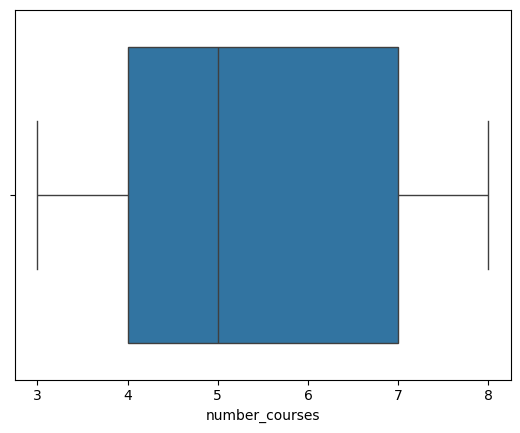

In [4]:
sns.boxplot(x=data['number_courses'])

<Axes: xlabel='time_study'>

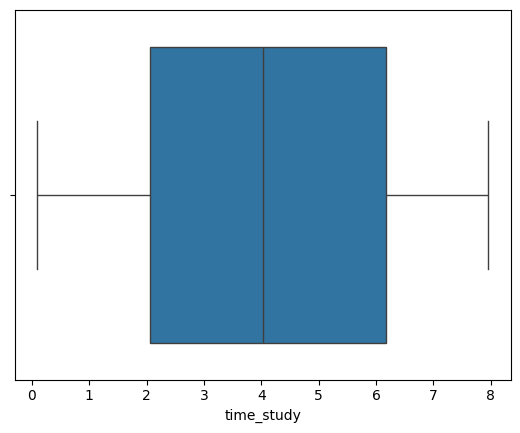

In [5]:
sns.boxplot(x=data['time_study'])

<Axes: xlabel='Marks'>

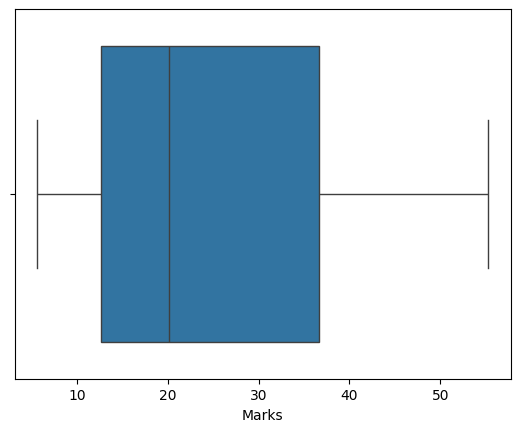

In [6]:
sns.boxplot(x=data['Marks'])

In [7]:
import numpy as np

# Assuming data is a pandas DataFrame with columns 'number_courses', 'time_study', and 'Marks'
X = data[['number_courses', 'time_study']].values  # Input features
y = data['Marks'].values  # Output/target

# Normalize features (optional but recommended for faster convergence)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Add a column of ones to X for the intercept term (theta_0)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize parameters
theta = np.zeros(X.shape[1])  # [theta_0, theta_1, theta_2]
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations
m = len(y)  # Number of data points

# Gradient Descent
for epoch in range(epochs):
    # Hypothesis
    h = X.dot(theta)  # h(x) = theta_0 * 1 + theta_1 * x_1 + theta_2 * x_2
    
    # Compute the gradients
    gradient = (1/m) * X.T.dot(h - y)
    
    # Update parameters
    theta -= alpha * gradient
    
    # Optional: Print the cost every 100 iterations for tracking
    if epoch % 100 == 0:
        cost = (1/(2*m)) * np.sum((h - y)**2)
        print(f'Epoch {epoch}: Cost {cost}, Theta: {theta}')

# Final parameters
print(f'Final parameters: {theta}')


Epoch 0: Cost 399.705575385, Theta: [0.2441769  0.05948849 0.13431252]
Epoch 100: Cost 56.46514859336752, Theta: [15.5694024   3.07409721  8.28252883]
Epoch 200: Cost 12.742975077794265, Theta: [21.17893057  3.57960465 11.09856009]
Epoch 300: Cost 6.975849695983642, Theta: [23.2321993   3.55381456 12.11268595]
Epoch 400: Cost 6.18896788322468, Theta: [23.98376207  3.46683435 12.49374903]
Epoch 500: Cost 6.077778996349592, Theta: [24.25885834  3.40525906 12.64282973]
Epoch 600: Cost 6.061459125830419, Theta: [24.35955248  3.37087203 12.70325432]
Epoch 700: Cost 6.058961755649931, Theta: [24.39640979  3.3534095  12.72846441]
Epoch 800: Cost 6.058562189448672, Theta: [24.40990075  3.34495915 12.73922008]
Epoch 900: Cost 6.0584953175375515, Theta: [24.41483888  3.34098003 12.74388516]
Final parameters: [24.41663586  3.33914903 12.74591921]


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import logging
import pickle  # Import pickle for saving the models

# Set up logging to capture the model's training and evaluation progress
logging.basicConfig(level=logging.INFO)

# Assuming data is a pandas DataFrame with columns 'number_courses', 'time_study', and 'Marks'
# Features and target
X = data[['number_courses', 'time_study']].values
y = data['Marks'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Part 1: Training and Testing with scikit-learn ---- #

logging.info("Training using scikit-learn's Linear Regression...")

# Initialize and train the Linear Regression model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_sklearn = model_sklearn.predict(X_test)

# Evaluate the scikit-learn model
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

logging.info(f"Mean Squared Error (scikit-learn): {mse_sklearn}")
logging.info(f"R² Score (scikit-learn): {r2_sklearn}")

# ---- Part 2: Training using Custom Gradient Descent ---- #

# Normalize features (optional but recommended for faster convergence)
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train_norm = (X_train - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std

# Add a column of ones to X for the intercept term (theta_0)
X_train_norm = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_test_norm = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])

# Initialize parameters
theta = np.zeros(X_train_norm.shape[1])  # [theta_0, theta_1, theta_2]
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations
m = len(y_train)  # Number of data points

# Gradient Descent
logging.info("Training using custom Gradient Descent...")

for epoch in range(epochs):
    # Hypothesis
    h = X_train_norm.dot(theta)  # h(x) = theta_0 + theta_1 * x_1 + theta_2 * x_2
    
    # Compute the gradients
    gradient = (1/m) * X_train_norm.T.dot(h - y_train)
    
    # Update parameters
    theta -= alpha * gradient
    
    # Optional: Print the cost every 100 iterations for tracking
    if epoch % 100 == 0:
        cost = (1/(2*m)) * np.sum((h - y_train)**2)
        logging.info(f'Epoch {epoch}: Cost {cost}')

# Make predictions using the custom Gradient Descent model
y_pred_gd = X_test_norm.dot(theta)

# Evaluate the custom Gradient Descent model
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

logging.info(f"Mean Squared Error (Gradient Descent): {mse_gd}")
logging.info(f"R² Score (Gradient Descent): {r2_gd}")
logging.info(f"Final parameters (Gradient Descent): {theta}")

# ---- Save the models using Pickle ---- #
# Save the scikit-learn Linear Regression model
with open("sklearn_model.pkl", "wb") as file:
    pickle.dump(model_sklearn, file)

# Save the gradient descent model parameters (theta), normalization mean and std
with open("gradient_descent_model.pkl", "wb") as file:
    pickle.dump({'theta': theta, 'X_mean': X_mean, 'X_std': X_std}, file)

logging.info("Models saved: 'sklearn_model.pkl' and 'gradient_descent_model.pkl'")


INFO:root:Training using scikit-learn's Linear Regression...
INFO:root:Mean Squared Error (scikit-learn): 14.200726136374547
INFO:root:R² Score (scikit-learn): 0.9459936100591213
INFO:root:Training using custom Gradient Descent...
INFO:root:Epoch 0: Cost 363.00711317500003
INFO:root:Epoch 100: Cost 52.38238932911013
INFO:root:Epoch 200: Cost 12.099666453599868
INFO:root:Epoch 300: Cost 6.799356095917358
INFO:root:Epoch 400: Cost 6.092102848412749
INFO:root:Epoch 500: Cost 5.996407869637299
INFO:root:Epoch 600: Cost 5.983275050001609
INFO:root:Epoch 700: Cost 5.981445923088917
INFO:root:Epoch 800: Cost 5.981187150347327
INFO:root:Epoch 900: Cost 5.98114992797327
INFO:root:Mean Squared Error (Gradient Descent): 14.20500401382804
INFO:root:R² Score (Gradient Descent): 0.9459773409813534
INFO:root:Final parameters (Gradient Descent): [23.31844327  3.34520128 12.18200903]
INFO:root:Models saved: 'sklearn_model.pkl' and 'gradient_descent_model.pkl'
